In [14]:
import os, shutil
import matplotlib.pylab as plt
import matplotlib.image as mpimg

base_dir = 'd:\\Temp\\cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

validation_cat_dir = os.path.join(validation_dir, 'cats')
validation_dog_dir = os.path.join(validation_dir, 'dogs')

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
1000


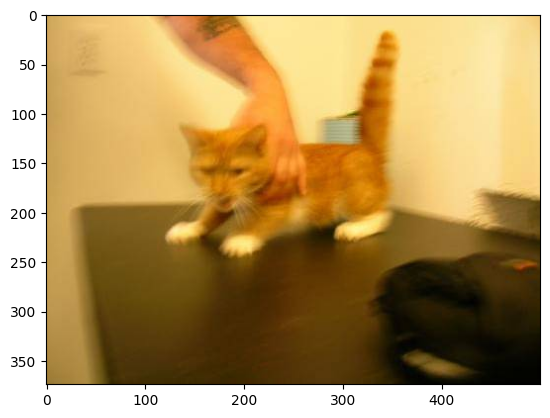

In [16]:
train_cat_fnames = os.listdir(train_cat_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dog_dir)
print(len(train_dog_fnames))

img = mpimg.imread(os.path.join(train_cat_dir, train_cat_fnames[0]))
plt.imshow(img)

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential([
    layers.InputLayer(input_shape=(150, 150, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(32, (3, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [35]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

val_gen = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

history = model.fit_generator(
    train_gen,
    steps_per_epoch=100,
    epochs=20,
    validation_data=val_gen,
    validation_steps=50,
    callbacks=[early_stopping],
    verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 7s 62ms/step - loss: 0.0727 - accuracy: 0.9800 - val_loss: 1.3594 - val_accuracy: 0.7240
Epoch 2/20
100/100 [==============================] - 6s 60ms/step - loss: 0.0198 - accuracy: 0.9925 - val_loss: 1.6418 - val_accuracy: 0.7240
Epoch 3/20
100/100 [==============================] - 6s 60ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 1.8771 - val_accuracy: 0.7140
Epoch 4/20
100/100 [==============================] - 6s 61ms/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 1.8502 - val_accuracy: 0.7080


<Figure size 640x480 with 0 Axes>

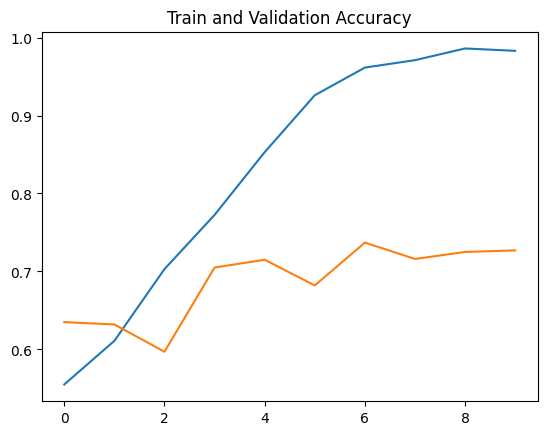

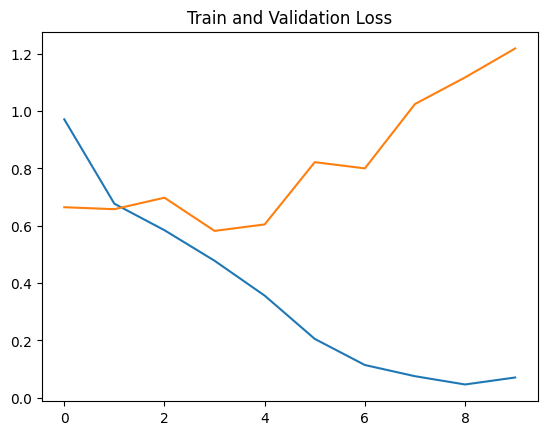

<Figure size 640x480 with 0 Axes>

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Train and Validation Accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Train and Validation Loss')
plt.figure()